In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import six
import sys

sys.modules['sklearn.externals.six'] = six
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier

import pickle 

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the Wine Recognition Dataset

In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")

In [ ]:
data.columns = ["Target",'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

Since the raw data does not come with the column names, we manually insert the column names on the dataframe.


In [ ]:
data.skew()

Target                          0.097941
Alcohol                        -0.046483
Malic acid                      1.030975
Ash                            -0.172406
Alcalinity of ash               0.204076
Magnesium                       1.122148
Total phenols                   0.097688
Flavanoids                      0.036880
Nonflavanoid phenols            0.440937
Proanthocyanins                 0.532787
Color intensity                 0.870850
Hue                             0.026964
OD280/OD315 of diluted wines   -0.320424
Proline                         0.783800
dtype: float64

Using the skew method, we did not observe any significant skewness of the data. 



In [ ]:
data

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


***Dataset***: Over here, we can see that there are a total of **14 columns**, including the **Target** column, which we are trying to predict. The other 13 columns are features, which are the **chemical analysis** of the wine used to predict the target.

Let us first analyse the data to understand them further.

**1) Target**


In [ ]:
data['Target'].value_counts()

2    71
1    58
3    48
Name: Target, dtype: int64

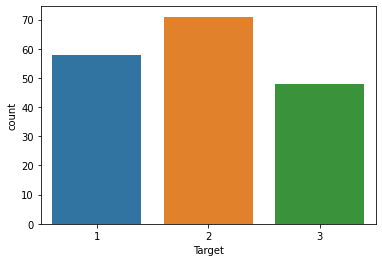

In [ ]:
sns.countplot(x='Target', data=data)

In the **target** column, there are **3 classes**; 1, 2 and 3. These 3 classes represent the 3 types of wine grown in a same area in Italy by 3 different cultivators.

We can see that Class 1 has 58 elements, while class 2 has 71 and class 3 48.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target                        177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

There are no **null** values in the dataset, and the data type are in float and integer. Hence, we do not need to transform the data into other data types.



# EDA

Now, let's visualise the dataset to get a deeper understanding of the dataset


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbee051d10>


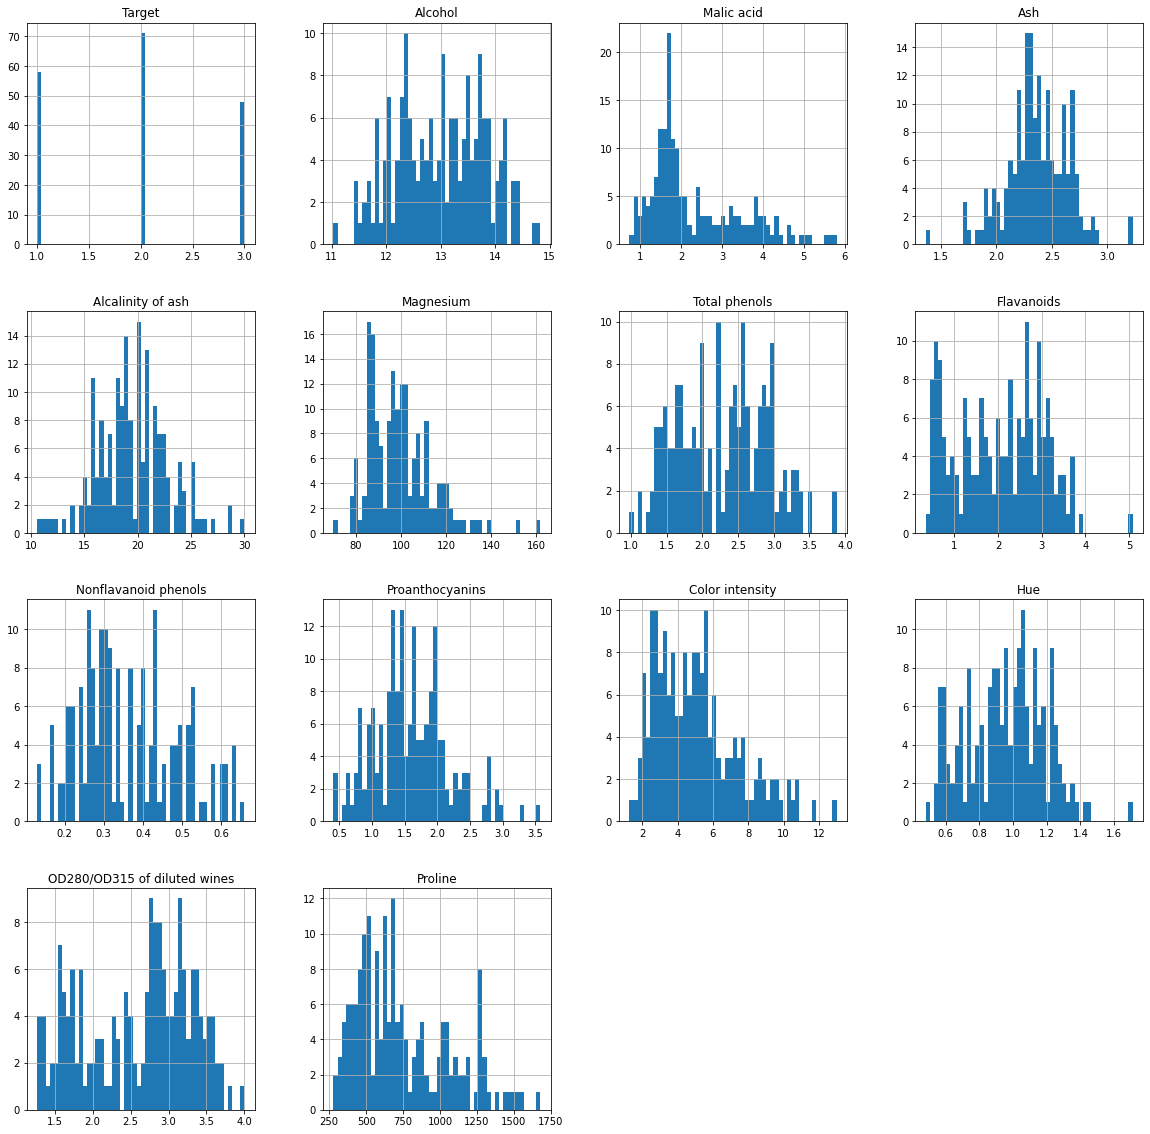

In [ ]:
print(data.hist(bins=50, figsize=(20,20)))

We can see that there is no significant skewness of the data. Now let's plot the dataset in a **correlation matrix** to see if there are any correlation between the features and the target.


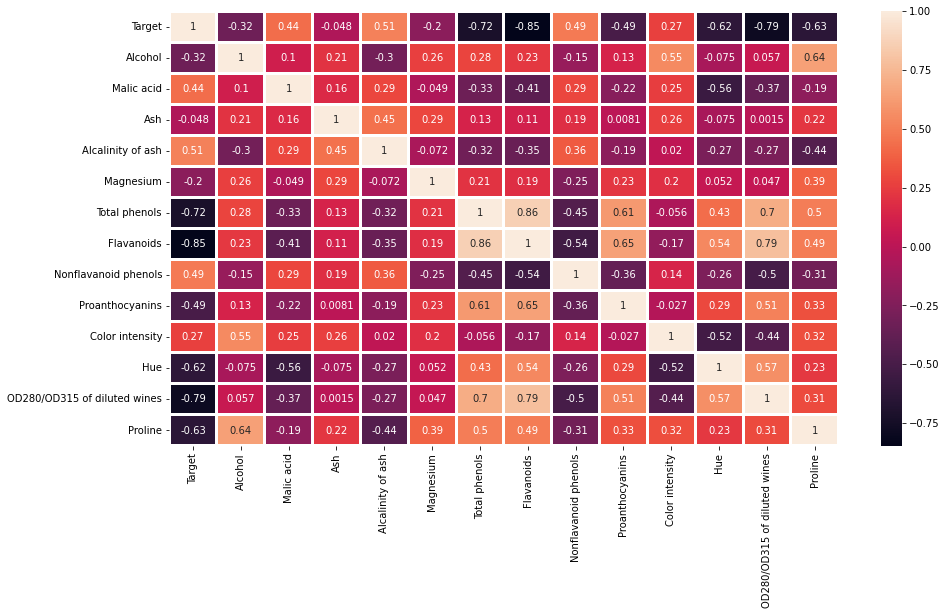

In [ ]:
plt.figure(figsize=(15,8))
corr_matrix = data.corr()
sns.heatmap(data=corr_matrix, annot=True, linewidths=2)

plt.show()

***Results***: As seen from the correlation matrix, '**Total phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines', and 'Proline**' have among the highest correlation with the target. This suggests that the features used for the training model may be able to predict the target well.

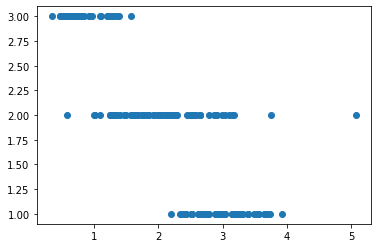

In [ ]:
x = data['Flavanoids']
y = data['Target']

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

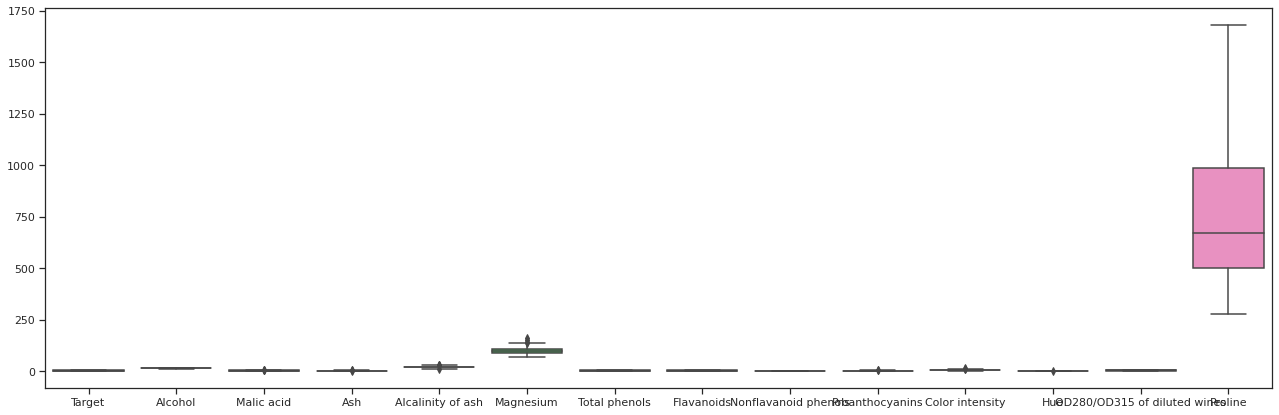

In [ ]:
plt.figure(figsize=(22,7))
sns.set_theme(style="ticks")
sns.boxplot(data=data)

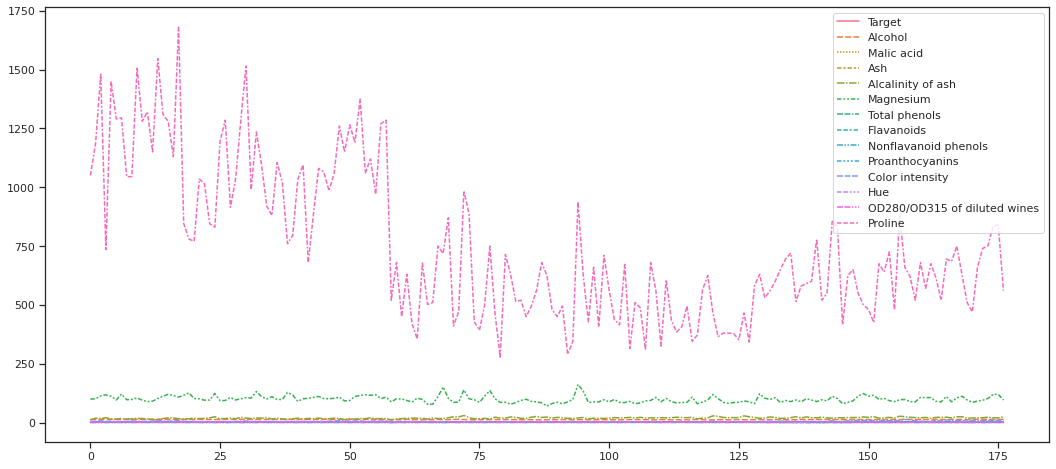

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(data=data)

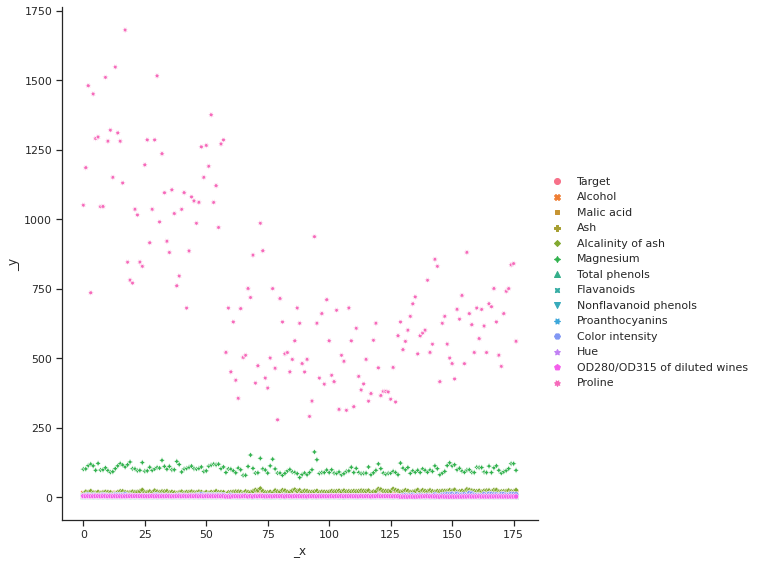

In [ ]:
sns.relplot(height=8, data=data)

Lets choose a few of the features with the **higher correlation** with the target and plot them in a pairplot.


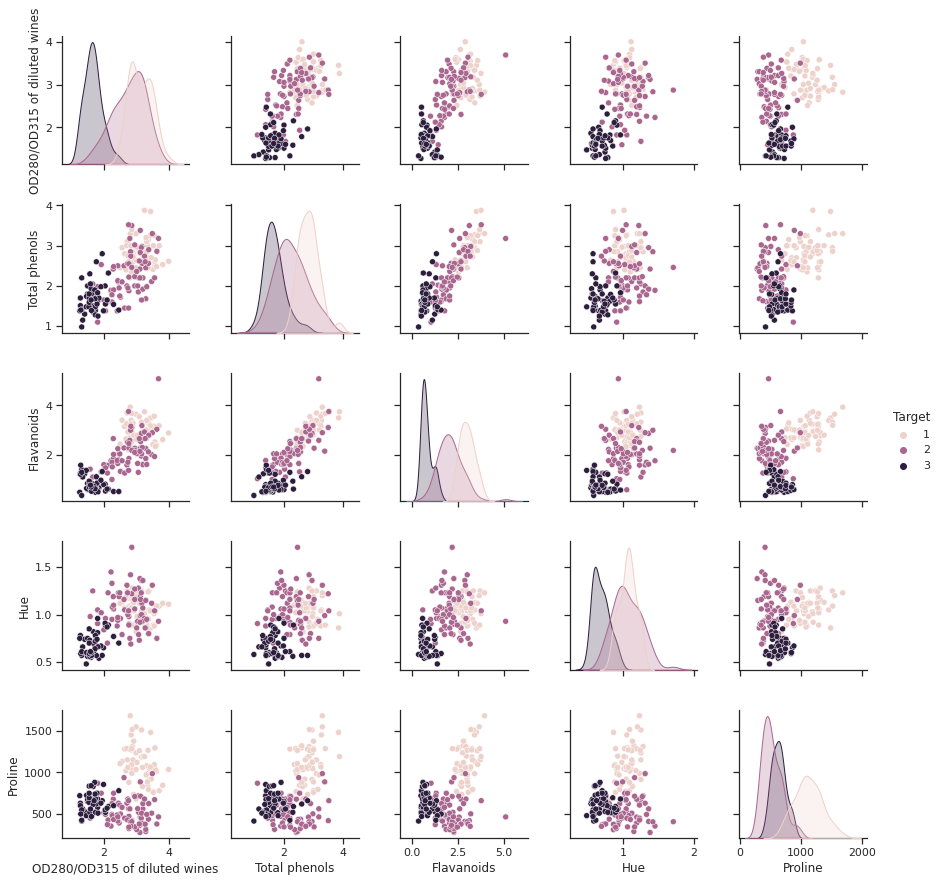

In [ ]:
s=data[['OD280/OD315 of diluted wines','Total phenols','Flavanoids','Hue','Proline','Target']]
sns.pairplot(s,hue='Target')
#takes about 20 seconds to run

# Model Training

Now that we have performed some EDA on the dataset, lets proceed to the training of our model.

Lets define the X by dropping the 'Ash' column since it has the lowest correlation with the target, and hence may not be able to provide good training for our model. We will also drop the 'Target' column, since we are trying to predict the label Y.


In [ ]:
X = data.drop(['Ash','Target'],axis=1)
print(X)

     Alcohol  Malic acid  Alcalinity of ash  Magnesium  Total phenols  \
0      13.20        1.78               11.2        100           2.65   
1      13.16        2.36               18.6        101           2.80   
2      14.37        1.95               16.8        113           3.85   
3      13.24        2.59               21.0        118           2.80   
4      14.20        1.76               15.2        112           3.27   
..       ...         ...                ...        ...            ...   
172    13.71        5.65               20.5         95           1.68   
173    13.40        3.91               23.0        102           1.80   
174    13.27        4.28               20.0        120           1.59   
175    13.17        2.59               20.0        120           1.65   
176    14.13        4.10               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          2.76                  0.26     

Next, we define Y as the 'Target'. This is the class we are predicting. There are a total of 3 classes in Y.


In [ ]:
Y = data['Target']
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: Target, Length: 177, dtype: int64


Next, we begin by splitting the dataset into **training and testing set, using a 80/20 distribution.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(141, 12)
(36, 12)


We do not need to encode the data since they are already in numerical format and non categorical. 

Let try using Random Forest classifier to train our first model.

***1) Random Forest Classifier***


In [ ]:
rfc = RandomForestClassifier(random_state=1)
model = rfc.fit(X_train,y_train)

Next, we predict on the test dataset.

In [ ]:
pred_rfc = rfc.predict(X_test)

91.66666666666666
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.92      0.86      0.89        14
           3       0.80      1.00      0.89         8

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.91        36
weighted avg       0.93      0.92      0.92        36



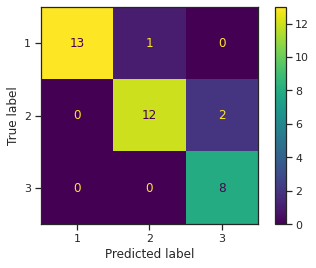

In [ ]:
print(accuracy_score(y_test, pred_rfc) * 100)
print(classification_report(y_test, pred_rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_rfc))


***Results***: Using Random Forest classifier, we are able to get an accuracy score of **91.66%**.





***2) Decision Tree Classifier***

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
pred_dtc = dtc.predict(X_test)

88.88888888888889
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.92      0.79      0.85        14
           3       0.73      1.00      0.84         8

    accuracy                           0.89        36
   macro avg       0.88      0.90      0.88        36
weighted avg       0.91      0.89      0.89        36



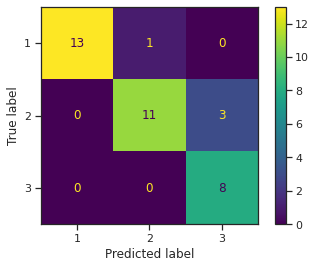

In [ ]:
print(accuracy_score(y_test, pred_dtc) * 100)
print(classification_report(y_test, pred_dtc))
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_dtc))


***Results***: Using Decision Tree classifier, we are able to get an accuracy score of **88.89%**.


***3) Naive Bayes Classifier***

In [ ]:
nbc = GaussianNB()
nbc.fit(X_train,y_train)

GaussianNB()

In [ ]:
pred_nbc = nbc.predict(X_test)

88.88888888888889
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.92      0.79      0.85        14
           3       0.80      1.00      0.89         8

    accuracy                           0.89        36
   macro avg       0.88      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



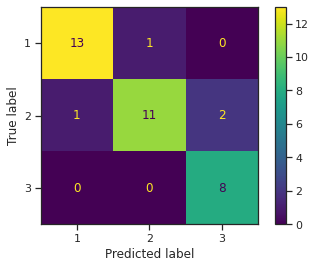

In [ ]:
print(accuracy_score(y_test, pred_nbc) * 100)
print(classification_report(y_test, pred_nbc))
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_nbc))


***Results***: Using Naive Bayes classifier, we are able to get an accuracy score of **88.89%**.





***4) KNN Classifier***

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred_knn = knn.predict(X_test)

Accuracy score: 66.66666666666666
              precision    recall  f1-score   support

           1       0.92      0.79      0.85        14
           2       0.73      0.57      0.64        14
           3       0.38      0.62      0.48         8

    accuracy                           0.67        36
   macro avg       0.68      0.66      0.65        36
weighted avg       0.72      0.67      0.68        36



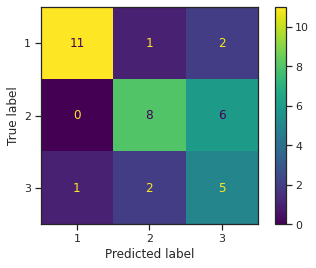

In [ ]:
print('Accuracy score:', accuracy_score(y_test, pred_knn) * 100)
print(classification_report(y_test, pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_knn))


***Results***: Using KNN classifier, we are able to get an accuracy score of **66.67%**.




***5) Support Vector Classifier***

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
pred_svc = svc.predict(X_test)

Accuracy score: 75.0
              precision    recall  f1-score   support

           1       1.00      0.71      0.83        14
           2       0.76      0.93      0.84        14
           3       0.44      0.50      0.47         8

    accuracy                           0.75        36
   macro avg       0.74      0.71      0.71        36
weighted avg       0.79      0.75      0.75        36



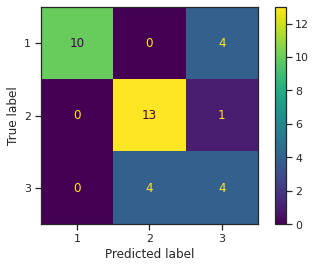

In [ ]:
print('Accuracy score:', accuracy_score(y_test, pred_svc) * 100)
print(classification_report(y_test, pred_svc))
print(ConfusionMatrixDisplay.from_predictions(y_test, pred_svc))


***Results***: Using Support Vector classifier, we are able to get an accuracy score of **75.00%**.




In [ ]:
pred_average = (pred_rfc + pred_dtc + pred_nbc + pred_knn + pred_svc)/5
# = 411.11 / 5
# = 82.22%

***Results***: From the results, we see that **KNN** has the lowest accuracy score of 66.67% vs 91.67% of the **Random Forest** classier. 

Lets try to find the average score of the 5 classifiers. Taking the average of the 5 classifiers, we see that the average accuracy score from the 5 base estimators is **82.22%**

Lets try to see if using Stacking ensemble learning method to train the model is able to get a better prediction score.

Let us define our base estimators first, we will be using the above 5 base estimators, and the meta-learner using logistic regression.





In [ ]:
estimators=[('Random Forest', rfc), ('Decision Tree', dtc),('Naive Bayes', nbc),
           ('KNN', knn),('SVC', svc)]
           
final_estimator=LogisticRegression()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(
 estimators=estimators, final_estimator=LogisticRegression()
 )

In [ ]:
stack = clf.fit(X_train, y_train)
stack_pred = stack.predict(X_test)

Accuracy score is: 88.88888888888889
              precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.86      0.86      0.86        14
           3       0.80      1.00      0.89         8

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



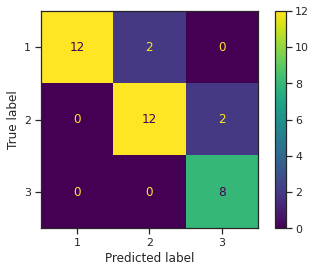

In [ ]:
stack_accuracy = accuracy_score(y_test, stack_pred)
print("Accuracy score is:", stack_accuracy * 100)
print(classification_report(y_test, stack_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, stack_pred))

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8888888888888888

***Results***: We can see that by combining the results from different classifiers under the stacking ensemble learning, and then using them as features to train the meta-learner, we are able to get a higher accuracy score of **88.89%** in the final result vs just **82.22%** from the average of the 5 classifiers when not using the stacking method. This shows that by using the stacking ensemble learning method, we are able to get a better prediction score.

Next, we try using the **voting ensemble** learning method and see if it can give a better result vs the stacking ensemble, and also compare the results to when not using any of the ensemble learning methods.

In [ ]:
estimators=[('Random Forest', rfc), ('Decision Tree', dtc),('Naive Bayes', nbc),
           ('KNN', knn),('SVC', svc)]

In [ ]:
from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier(n_estimators=500, random_state=0)  
dtc = DecisionTreeClassifier()
nbc = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC(probability=True, random_state=0) 

vclf = VotingClassifier(estimators=[('rfc',rfc), ('dtc',dtc), ('nbc', nbc), ('knn',knn), ('svc',svc)], voting='soft')

In [ ]:
vclf.fit(X_train, y_train) 


VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=0)),
                             ('dtc', DecisionTreeClassifier()),
                             ('nbc', GaussianNB()),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True, random_state=0))],
                 voting='soft')

In [ ]:
vpred = vclf.predict(X_test)

Accuracy score is: 91.66666666666666
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.92      0.86      0.89        14
           3       0.80      1.00      0.89         8

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.91        36
weighted avg       0.93      0.92      0.92        36



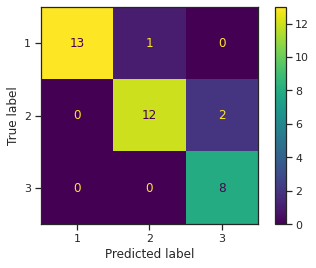

In [ ]:
voting_accuracy = accuracy_score(y_test, vpred)
print("Accuracy score is:", voting_accuracy * 100)
print(classification_report(y_test, vpred))
print(ConfusionMatrixDisplay.from_predictions(y_test, vpred))

***Results***: From the result above, when we used the soft voting, we are able to get an accuracy score of **91.67**%.

Lets try to see the result when using the hard voting approach.

In [ ]:
rfc = RandomForestClassifier(n_estimators=500, random_state=0)  
dtc = DecisionTreeClassifier()
nbc = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC(probability=True, random_state=0) 

vclf = VotingClassifier(estimators=[('rfc',rfc), ('dtc',dtc), ('nbc', nbc), ('knn',knn), ('svc',svc)], voting='hard')

In [ ]:
vclf.fit(X_train, y_train) 


VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=0)),
                             ('dtc', DecisionTreeClassifier()),
                             ('nbc', GaussianNB()),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True, random_state=0))])

In [ ]:
vpred = vclf.predict(X_test)

Accuracy score is: 94.44444444444444
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.86      0.92        14
           3       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.96      0.94      0.95        36



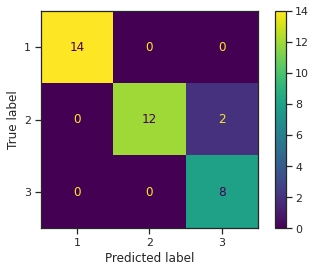

In [ ]:
voting_accuracy = accuracy_score(y_test, vpred)
print("Accuracy score is:", voting_accuracy * 100)
print(classification_report(y_test, vpred))
print(ConfusionMatrixDisplay.from_predictions(y_test, vpred))

**Results**: When we used the hard voting method, we are able to get a even higher accuracy score of **94.44%**.

# Conclusion



This assignment has shown that when we used ensemble learning method for our modelling, we are able to get a higher prediction score and accuracy. Regardless of whether we used the stacking or voting ensemble learning approach, they both have demonstrated that the accuracy scores are higher as compared to when not using the ensemble learning method, especially when we look at the comparison results from the average score of the base estimators vs the ensembles.

However, it is noted that when using Random Forest classifier, it was able to attain a score of 91.67%, which is on par with the result of using the 'soft' voting approach. The Random Forest classifier also demonstrated that it was able to get a higher score vs when using the Stacking ensemble approach. 

The Voting ensemble using the 'hard' voting method on the other hand, has shown that it was able to obtain the highest accuracy score of 94.44%, vs 91.67% when using the 'soft' voting approach, and 88.89% when using the stacking ensemble method, and 82.22% (average score from the 5 estimators) when not using any ensemble method.


